                                                              Level 2
                                                              Task 4 
                                                     Loan Approval Prediction Description
                                                         imtiaz ahmad
                                                         elevvo.tech
                                                         cairo,Egypt

In [54]:
#import the standard labraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

In [28]:
#load the dataset
df=pd.read_csv('loan_data_set.csv')

In [29]:
#Show the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
df.describe(include='all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [32]:
print(df['Loan_Status'].value_counts(normalize=True))

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [33]:
#  Fill Categorical Columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill Numerical Columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [34]:
# check missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Visualization 

# Loan Approval Rate (Loan_Status)

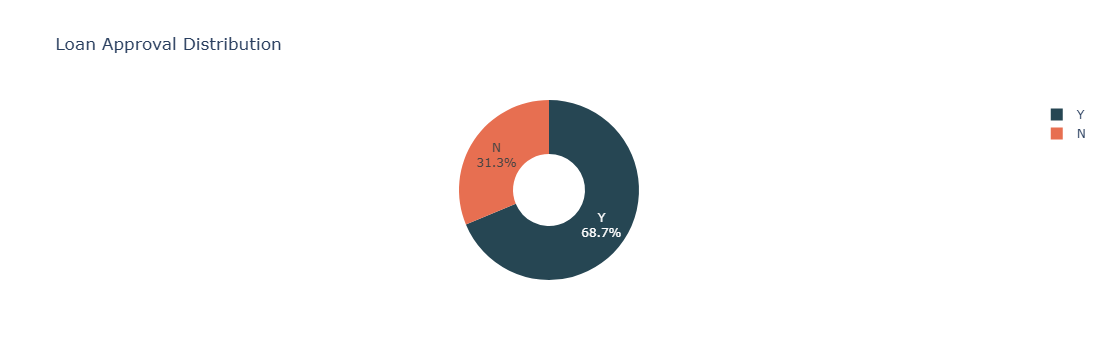

In [40]:
fig1 = px.pie(df, names='Loan_Status', title='Loan Approval Distribution',
              color_discrete_sequence=['#264653', '#e76f51'],
              hole=0.4)
fig1.update_traces(textinfo='percent+label')
fig1.show()

# Loan Status by Property Area

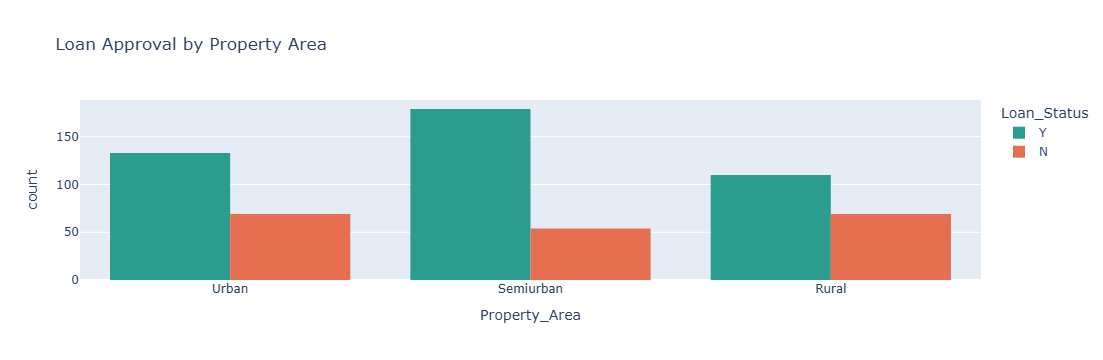

In [41]:
fig2 = px.histogram(df, x='Property_Area', color='Loan_Status', barmode='group',
                    title='Loan Approval by Property Area',
                    color_discrete_map={'Y': '#2a9d8f', 'N': '#e76f51'})
fig2.show()

# Applicant Income vs Loan Amount (by Loan Status)

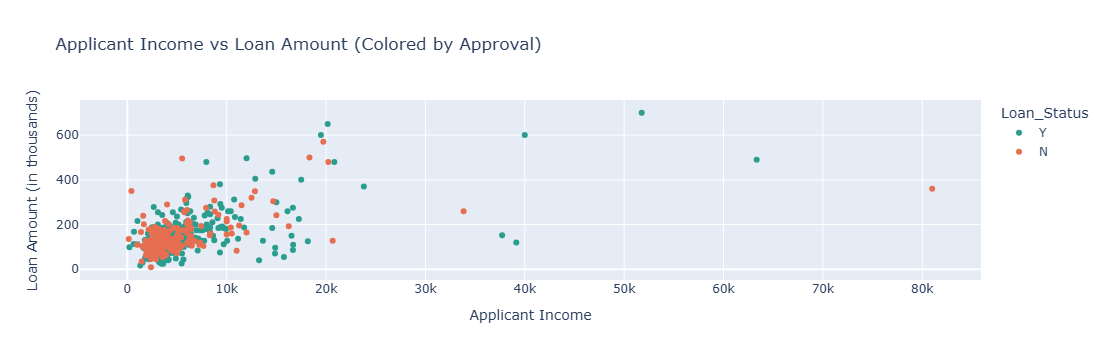

In [43]:
fig3 = px.scatter(df, x='ApplicantIncome', y='LoanAmount', color='Loan_Status',
                  title='Applicant Income vs Loan Amount (Colored by Approval)',
                  hover_data=['Loan_ID'],
                  color_discrete_map={'Y': '#2a9d8f', 'N': '#e76f51'})
fig3.update_layout(xaxis_title="Applicant Income", yaxis_title="Loan Amount (in thousands)")
fig3.show()

# Education vs Loan Approval

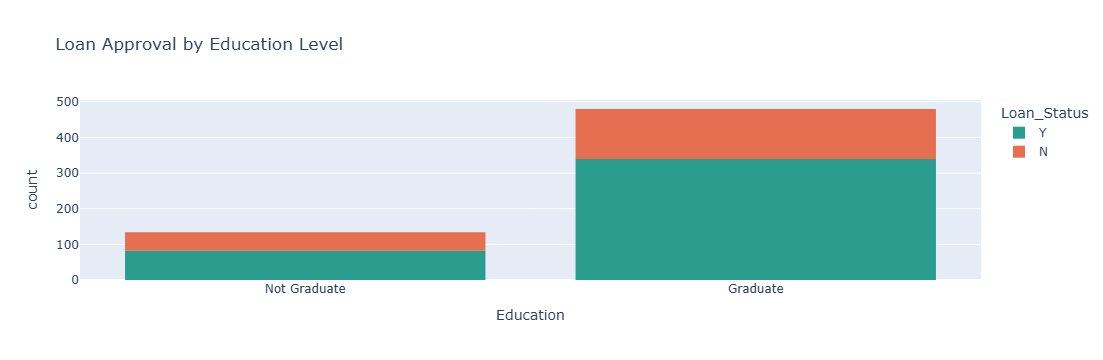

In [44]:
fig4 = px.histogram(df, x='Education', color='Loan_Status', 
                    title='Loan Approval by Education Level',
                    color_discrete_map={'Y': '#2a9d8f', 'N': '#e76f51'},
                    category_orders={'Education': ['Not Graduate', 'Graduate']})
fig4.show()

# Data preprocessing

In [46]:
# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Convert to binary

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building and Evaluation

In [47]:
#Baseline Models (Without Handling Imbalance) 
# Logistic Regression
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Decision Tree
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion Matrix:
 [[22 16]
 [ 1 84]]

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        38
           1       0.84      0.89      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.75      0.76       123
weighted avg       0.80      0.80      0.80       123

Confusion Matrix:
 [[23 15]
 [ 9 76]]


# Models with SMOTE for Handling Class Imbalance

In [48]:
# Logistic Regression with SMOTE
lr_smote_pipe = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)

lr_smote_pipe.fit(X_train, y_train)
y_pred_lr_smote = lr_smote_pipe.predict(X_test)

print("Logistic Regression with SMOTE Performance:")
print(classification_report(y_test, y_pred_lr_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_smote))

# Decision Tree with SMOTE
dt_smote_pipe = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    DecisionTreeClassifier(random_state=42)
)

dt_smote_pipe.fit(X_train, y_train)
y_pred_dt_smote = dt_smote_pipe.predict(X_test)

print("\nDecision Tree with SMOTE Performance:")
print(classification_report(y_test, y_pred_dt_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_smote))

Logistic Regression with SMOTE Performance:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76        38
           1       0.86      0.96      0.91        85

    accuracy                           0.87       123
   macro avg       0.88      0.81      0.83       123
weighted avg       0.87      0.87      0.86       123

Confusion Matrix:
 [[25 13]
 [ 3 82]]

Decision Tree with SMOTE Performance:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        38
           1       0.87      0.93      0.90        85

    accuracy                           0.85       123
   macro avg       0.84      0.81      0.82       123
weighted avg       0.85      0.85      0.85       123

Confusion Matrix:
 [[26 12]
 [ 6 79]]


# Model Comparison and Selection

In [50]:
# Compare all models
models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Logistic Regression + SMOTE': y_pred_lr_smote,
    'Decision Tree + SMOTE': y_pred_dt_smote
}

results = []
for name, preds in models.items():
    results.append({
        'Model': name,
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds)
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values('F1-Score', ascending=False))


Model Comparison:
                         Model  Precision    Recall  F1-Score
2  Logistic Regression + SMOTE   0.863158  0.964706  0.911111
0          Logistic Regression   0.840000  0.988235  0.908108
3        Decision Tree + SMOTE   0.868132  0.929412  0.897727
1                Decision Tree   0.835165  0.894118  0.863636


# Feature Importance Analysis

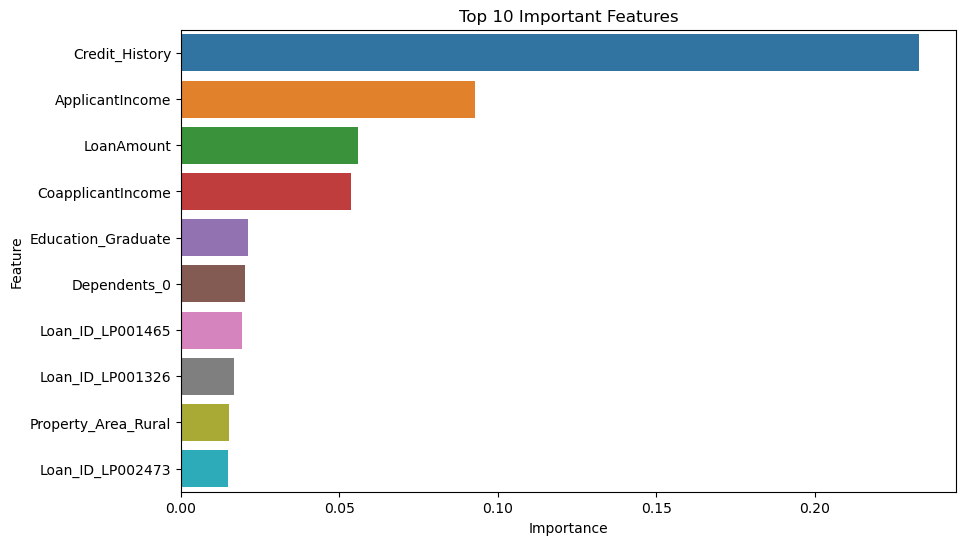

In [52]:
# For the best performing model (assuming it's Decision Tree with SMOTE)
best_model = dt_smote_pipe.named_steps['decisiontreeclassifier']
feature_names = (num_cols.tolist() + 
                dt_smote_pipe.named_steps['columntransformer']
                .named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(cat_cols).tolist())

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.show()